# [Deep Learning](https://www.cc.gatech.edu/~hays/compvision/proj6/)

## Setup

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import random
import torch.nn as nn
import torch.optim as optim
import os.path as osp
import matplotlib.pyplot as plt
from utils import *
import student_code as sc
import torchvision.models as models
data_path = osp.join('../data', '15SceneData')
num_classes = 15

# If you have a good Nvidia GPU with an appropriate environment, 
# try setting the use_GPU flag to True (the environment provided does
# not support GPUs and we will not provide any support for GPU
# computation in this project). Please note that 
# we will evaluate your implementations only using CPU mode so even if
# you use a GPU, make sure your code runs in the CPU mode with the
# environment we provided. 
use_GPU = False
if use_GPU:
    from utils_gpu import *

To train a network in PyTorch, we need 4 components:
1. **Dataset** - an object which can load the data and labels given an index.
2. **Model** - an object that contains the network architecture definition.
3. **Loss function** - a function that measures how far the network output is from the ground truth label.
4. **Optimizer** - an object that optimizes the network parameters to reduce the loss value.

This project has two main parts. In Part 1, you will train a deep network from scratch. In Part 2, you will "fine-tune" a trained network. 

## Part 0. Warm up! Training a Deep Network from Scratch

In [2]:
# Fix random seeds so that results will be reproducible
set_seed(0, use_GPU)

You do not need to code anything for this part. You will simply run the code we provided, but we want you to report the result you got. This section will also familiarize you with the steps of training a deep network from scratch. 

In [3]:
# Training parameters.
input_size = (64, 64)
RGB = False  
base_lr = 1e-2  # may try a smaller lr if not using batch norm
weight_decay = 5e-4
momentum = 0.9

We will first create our datasets, by calling the create_datasets function from student_code. This function returns a separate dataset loader for each split of the dataset (training and testing/validation). Each dataloader is used to load the datasets after appling some pre-processing transforms. In Part 1, you will be asked to add a few more pre-processing transforms to the dataloaders by modifying this function.

In [4]:
# Create the training and testing datasets.
train_dataset, test_dataset = sc.create_datasets(data_path=data_path, input_size=input_size, rgb=RGB)
assert test_dataset.classes == train_dataset.classes

Computing pixel mean and stdev...
Batch 0 / 30
Batch 20 / 30
Done, mean = 
[0.45579668]
std = 
[0.23624939]
Computing pixel mean and stdev...
Batch 0 / 60
Batch 20 / 60
Batch 40 / 60
Done, mean = 
[0.45517009]
std = 
[0.2350788]


Now we will create our network model using the SimpleNet class from student_code. The implementation provided in the SimpleNet class gives you a basic network. In Part 1, you will be asked to add a few more layers to this network. 

In [5]:
# Create the network model.
model = sc.SimpleNet(num_classes=num_classes, rgb=False, verbose=False)
if use_GPU:
    model = model.cuda()
print(model)

SimpleNet(
  (features): Sequential(
    (0): Conv2d(1, 10, kernel_size=(9, 9), stride=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=7, stride=7, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (classifier): Conv2d(10, 15, kernel_size=(8, 8), stride=(1, 1))
)


Next we will create the loss function and the optimizer. 

In [6]:
# Create the loss function.
# see http://pytorch.org/docs/0.3.0/nn.html#loss-functions for a list of available loss functions
loss_function = nn.CrossEntropyLoss()

In [7]:
# Create the optimizer and a learning rate scheduler
optimizer = optim.SGD(params=model.parameters(), lr=base_lr, weight_decay=weight_decay, momentum=momentum)
# Currently a simple step scheduler.
# See http://pytorch.org/docs/0.3.0/optim.html#how-to-adjust-learning-rate for various LR schedulers
# and how to use them
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=60, gamma=0.1)

Finally we are ready to train our network! We will start a local server to see the training progress of our network. Open a new terminal and activate the environment for this project. Then run the following command: **python -m visdom.server**. This will start a local server. The terminal output should give out a link like: "http://localhost:8097". Open this link in your browser. After you run the following block, visit this link again, and you will be able to see graphs showing the progress of your training! If you do not see any graphs, select Part 1 on the top left bar where is says Environment (only select Part 1, do not check main or Part 2).

In [8]:
# train the network!
params = {'n_epochs': 100, 'batch_size': 50, 'experiment': 'part1'}
trainer = Trainer(train_dataset, test_dataset, model, loss_function, optimizer, lr_scheduler, params)
best_prec1 = trainer.train_val()
print('Best top-1 Accuracy = {:4.3f}'.format(best_prec1))

---------------------------------------
Experiment: part1
n_epochs: 100
batch_size: 50
do_val: True
shuffle: True
num_workers: 4
val_freq: 1
print_freq: 100
experiment: part1
checkpoint_file: None
resume_optim: True
---------------------------------------
part1 Epoch 0 / 100
train part1: batch 0/29, loss 2.709, top-1 accuracy 8.000, top-5 accuracy 28.000
train part1: loss 2.708517
val part1: batch 0/59, loss 2.720, top-1 accuracy 0.000, top-5 accuracy 0.000
val part1: loss 2.708254
Checkpoint saved
BEST TOP1 ACCURACY SO FAR
part1 Epoch 1 / 100
train part1: batch 0/29, loss 2.706, top-1 accuracy 0.000, top-5 accuracy 42.000
train part1: loss 2.706191
val part1: batch 0/59, loss 2.649, top-1 accuracy 28.000, top-5 accuracy 100.000
val part1: loss 2.709384
Checkpoint saved
BEST TOP1 ACCURACY SO FAR
part1 Epoch 2 / 100
train part1: batch 0/29, loss 2.703, top-1 accuracy 8.000, top-5 accuracy 34.000
train part1: loss 2.699871
val part1: batch 0/59, loss 2.666, top-1 accuracy 0.000, top-5 ac

val part1: loss 2.781350
Checkpoint saved
part1 Epoch 62 / 100
train part1: batch 0/29, loss 0.500, top-1 accuracy 90.000, top-5 accuracy 100.000
train part1: loss 0.502227
val part1: batch 0/59, loss 4.226, top-1 accuracy 18.000, top-5 accuracy 58.000
val part1: loss 2.805928
Checkpoint saved
part1 Epoch 63 / 100
train part1: batch 0/29, loss 0.454, top-1 accuracy 90.000, top-5 accuracy 100.000
train part1: loss 0.499806
val part1: batch 0/59, loss 4.365, top-1 accuracy 18.000, top-5 accuracy 58.000
val part1: loss 2.796631
Checkpoint saved
BEST TOP1 ACCURACY SO FAR
part1 Epoch 64 / 100
train part1: batch 0/29, loss 0.506, top-1 accuracy 84.000, top-5 accuracy 100.000
train part1: loss 0.491078
val part1: batch 0/59, loss 4.261, top-1 accuracy 18.000, top-5 accuracy 56.000
val part1: loss 2.813836
Checkpoint saved
part1 Epoch 65 / 100
train part1: batch 0/29, loss 0.426, top-1 accuracy 86.000, top-5 accuracy 100.000
train part1: loss 0.488218
val part1: batch 0/59, loss 4.450, top-1 a

Expect this code to take around 5 minutes on CPU or 3 minutes on GPU. Now you are ready to actually modify the functions we used to train our model. Before you move on, make sure to record the accuracy of your network from Part 0, and report it in your write up. 

## Part 1: Modifying the Dataloaders and the Simple Network create_datasets

In [9]:
# Fix random seeds so that results will be reproducible
set_seed(0, use_GPU)

Now you will modify the create_datasets function from student_code. You will add random left-right mirroring and normalization to the transformations applied to the training dataset. You will also add normalization to the transformations applied to the testing dataset. 

In [10]:
# Create the training and testing datasets.
train_dataset, test_dataset = sc.create_datasets(data_path=data_path, input_size=input_size, rgb=RGB)
assert test_dataset.classes == train_dataset.classes

Computing pixel mean and stdev...
Batch 0 / 30
Batch 20 / 30
Done, mean = 
[0.45579668]
std = 
[0.23624939]
Computing pixel mean and stdev...
Batch 0 / 60
Batch 20 / 60
Batch 40 / 60
Done, mean = 
[0.45517009]
std = 
[0.2350788]


Now you will modify SimpleNet by adding droppout, batch normalization, and additional convolution/maxpool/relu layers. You should achieve an accuracy of at least **50%**. Make sure your network passes this threshold--it is required for full credit on this section!

You can also use the following two blocks to determine the stucture of your network.

In [11]:
# create the network model
model = sc.SimpleNet(num_classes=num_classes, rgb=False, verbose=False)
if use_GPU:
    model = model.cuda()
print(model)

SimpleNet(
  (features): Sequential(
    (0): Conv2d(1, 10, kernel_size=(9, 9), stride=(1, 1), bias=False)
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=7, stride=7, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5)
  )
  (classifier): Conv2d(10, 15, kernel_size=(8, 8), stride=(1, 1))
)


In [12]:
# Use this block to determine the kernel size of the conv2d layer in the classifier
# first, set the kernel size of that conv2d layer to 1, and run this block
# then, use that size of input to the classifier printed by this block to
# go back and update the kernel size of the conv2d layer in the classifier
# Finally, run this block again and verify that the network output size is a scalar
# Don't forget to re-run the block above every time you update the SimpleNet class!
from torch.autograd import Variable
data, _ = train_dataset[0]
s = data.size()
data = Variable(data.view(1, *s))
if use_GPU:
    data = data.cuda()
out = model(data)
print('Network output size is ', out.size())

Network output size is  torch.Size([15])


Next we will create the loss function and the optimizer. You do not have to modify the custom_part1_trainer in student_code if you use the same loss_function, optimizer, scheduler and parameters (n_epoch, batch_size etc.) as provided in this notebook to hit the required threshold of 50% accuracy. If you changed any of these values, it is important that you modify this function in student_code since we will not be using the notebook you submit to evaluate. 

In [13]:
# Set up the trainer. You can modify custom_part1_trainer in
# student_copy.py if you want to try different learning settings.
custom_part1_trainer = sc.custom_part1_trainer(model)

if custom_part1_trainer is None:
    # Create the loss function.
    # see http://pytorch.org/docs/0.3.0/nn.html#loss-functions for a list of available loss functions
    loss_function = nn.CrossEntropyLoss()

    # Create the optimizer and a learning rate scheduler.
    optimizer = optim.SGD(params=model.parameters(), lr=base_lr, weight_decay=weight_decay, momentum=momentum)
    # Currently a simple step scheduler, but you can get creative.
    # See http://pytorch.org/docs/0.3.0/optim.html#how-to-adjust-learning-rate for various LR schedulers
    # and how to use them
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=60, gamma=0.1)

    params = {'n_epochs': 100, 'batch_size': 50, 'experiment': 'part1'}
    
else:
    if 'loss_function' in custom_part1_trainer:
        loss_function = custom_part1_trainer['loss_function']
    if 'optimizer' in custom_part1_trainer:
        optimizer = custom_part1_trainer['optimizer']
    if 'lr_scheduler' in custom_part1_trainer:
        lr_scheduler = custom_part1_trainer['lr_scheduler']
    if 'params' in custom_part1_trainer:
        params = custom_part1_trainer['params']

We are ready to train our network! As before, we will start a local server to see the training progress of our network (if you server is already running, you should not start another one). Open a new terminal and activate the environment for this project. Then run the following command: **python -m visdom.server**. This will start a local server. The terminal output should give out a link like: "http://localhost:8097". Open this link in your browser. After you run the following block, visit this link again, and you will be able to see graphs showing the progress of your training! If you do not see any graphs, select Part 1 on the top left bar where is says Environment (only select Part 1, do not check main or Part 2).

In [14]:
# Train the network!
trainer = Trainer(train_dataset, test_dataset, model, loss_function, optimizer, lr_scheduler, params)
best_prec1 = trainer.train_val()
print('Best top-1 Accuracy = {:4.3f}'.format(best_prec1))

---------------------------------------
Experiment: part1
n_epochs: 100
batch_size: 50
do_val: True
shuffle: True
num_workers: 4
val_freq: 1
print_freq: 100
experiment: part1
checkpoint_file: None
resume_optim: True
---------------------------------------
part1 Epoch 0 / 100
train part1: batch 0/29, loss 2.709, top-1 accuracy 10.000, top-5 accuracy 30.000
train part1: loss 2.526204
val part1: batch 0/59, loss 1.792, top-1 accuracy 38.000, top-5 accuracy 78.000
val part1: loss 2.607826
Checkpoint saved
BEST TOP1 ACCURACY SO FAR
part1 Epoch 1 / 100
train part1: batch 0/29, loss 2.497, top-1 accuracy 28.000, top-5 accuracy 62.000
train part1: loss 2.197321
val part1: batch 0/59, loss 2.703, top-1 accuracy 16.000, top-5 accuracy 60.000
val part1: loss 2.405490
Checkpoint saved
BEST TOP1 ACCURACY SO FAR
part1 Epoch 2 / 100
train part1: batch 0/29, loss 2.066, top-1 accuracy 28.000, top-5 accuracy 76.000
train part1: loss 1.998264
val part1: batch 0/59, loss 2.565, top-1 accuracy 20.000, top

train part1: batch 0/29, loss 1.132, top-1 accuracy 60.000, top-5 accuracy 94.000
train part1: loss 1.184061
val part1: batch 0/59, loss 2.265, top-1 accuracy 22.000, top-5 accuracy 68.000
val part1: loss 1.504421
Checkpoint saved
part1 Epoch 31 / 100
train part1: batch 0/29, loss 1.107, top-1 accuracy 66.000, top-5 accuracy 94.000
train part1: loss 1.217686
val part1: batch 0/59, loss 2.036, top-1 accuracy 26.000, top-5 accuracy 84.000
val part1: loss 1.469148
Checkpoint saved
part1 Epoch 32 / 100
train part1: batch 0/29, loss 1.149, top-1 accuracy 62.000, top-5 accuracy 94.000
train part1: loss 1.162077
val part1: batch 0/59, loss 1.944, top-1 accuracy 36.000, top-5 accuracy 78.000
val part1: loss 1.502160
Checkpoint saved
part1 Epoch 33 / 100
train part1: batch 0/29, loss 1.850, top-1 accuracy 46.000, top-5 accuracy 82.000
train part1: loss 1.231292
val part1: batch 0/59, loss 2.045, top-1 accuracy 28.000, top-5 accuracy 76.000
val part1: loss 1.570987
Checkpoint saved
part1 Epoch 3

val part1: batch 0/59, loss 1.848, top-1 accuracy 36.000, top-5 accuracy 82.000
val part1: loss 1.295457
Checkpoint saved
BEST TOP1 ACCURACY SO FAR
part1 Epoch 62 / 100
train part1: batch 0/29, loss 0.895, top-1 accuracy 74.000, top-5 accuracy 96.000
train part1: loss 0.850647
val part1: batch 0/59, loss 2.008, top-1 accuracy 30.000, top-5 accuracy 80.000
val part1: loss 1.290004
Checkpoint saved
BEST TOP1 ACCURACY SO FAR
part1 Epoch 63 / 100
train part1: batch 0/29, loss 1.071, top-1 accuracy 66.000, top-5 accuracy 94.000
train part1: loss 0.850959
val part1: batch 0/59, loss 2.010, top-1 accuracy 32.000, top-5 accuracy 80.000
val part1: loss 1.286640
Checkpoint saved
BEST TOP1 ACCURACY SO FAR
part1 Epoch 64 / 100
train part1: batch 0/29, loss 0.827, top-1 accuracy 76.000, top-5 accuracy 98.000
train part1: loss 0.855319
val part1: batch 0/59, loss 2.018, top-1 accuracy 32.000, top-5 accuracy 82.000
val part1: loss 1.279645
Checkpoint saved
part1 Epoch 65 / 100
train part1: batch 0/29

train part1: loss 0.828365
val part1: batch 0/59, loss 2.085, top-1 accuracy 28.000, top-5 accuracy 84.000
val part1: loss 1.258868
Checkpoint saved
BEST TOP1 ACCURACY SO FAR
part1 Epoch 94 / 100
train part1: batch 0/29, loss 0.428, top-1 accuracy 84.000, top-5 accuracy 100.000
train part1: loss 0.821419
val part1: batch 0/59, loss 2.047, top-1 accuracy 28.000, top-5 accuracy 84.000
val part1: loss 1.267059
Checkpoint saved
part1 Epoch 95 / 100
train part1: batch 0/29, loss 0.722, top-1 accuracy 66.000, top-5 accuracy 100.000
train part1: loss 0.835623
val part1: batch 0/59, loss 1.983, top-1 accuracy 32.000, top-5 accuracy 84.000
val part1: loss 1.281335
Checkpoint saved
part1 Epoch 96 / 100
train part1: batch 0/29, loss 0.756, top-1 accuracy 72.000, top-5 accuracy 100.000
train part1: loss 0.833581
val part1: batch 0/59, loss 1.998, top-1 accuracy 30.000, top-5 accuracy 82.000
val part1: loss 1.269315
Checkpoint saved
part1 Epoch 97 / 100
train part1: batch 0/29, loss 0.706, top-1 ac

Make sure you get at least 50% accuracy in this section! If you tried different settings than the ones provided to get 50%, you should modify custom_part1_trainer in student code to return a dictionary with your changed settings. 

## Part 2. Fine-Tuning a Pre-Trained Network

In [16]:
# Fix random seeds so that results will be reproducible
set_seed(0, use_GPU)

Training a network from scratch takes a lof of time. Instead of training from scratch, we can take a pre-trained model and fine tune it for our purposes. This is the goal of Part 2--you will train a pre-trained network, and achieve at least 80% accuracy. 

In [17]:
# training parameters
input_size = (224, 224)
RGB = True
base_lr = 1e-3
weight_decay = 5e-4
momentum = 0.9
backprop_depth = 3

In [18]:
# Create the training and testing datasets.
train_dataset, test_dataset = sc.create_datasets(data_path=data_path, input_size=input_size, rgb=RGB)
assert test_dataset.classes == train_dataset.classes

Computing pixel mean and stdev...
Batch 0 / 30
Batch 20 / 30
Done, mean = 
[0.45586014 0.45586014 0.45586014]
std = 
[0.24787705 0.24787705 0.24787705]
Computing pixel mean and stdev...
Batch 0 / 60
Batch 20 / 60
Batch 40 / 60
Done, mean = 
[0.45524448 0.45524448 0.45524448]
std = 
[0.24699316 0.24699316 0.24699316]


Following block loads a pretrained AlexNet.

In [19]:
from torchvision.models import alexnet

In [20]:
# Create the network model.
model = alexnet(pretrained=True)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

Now, you modify create_part2_model from student code in order to fine-tune AlexNet. As you can see in the docs (https://github.com/pytorch/vision/blob/master/torchvision/models/alexnet.py) and in the model printout above, AlexNet has 2 parts: 'features', which constists of conv layers that extract feature maps from the image, and 'classifier' which consists of FC layers that classify the features. We want to replace the last Linear layer in model.classifier. 

In [21]:
model = sc.create_part2_model(model, num_classes)
if use_GPU:
    model = model.cuda()
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

Next we will create the loss function and the optimizer. Just as with part 1, if you modify any of the setttings to hit the required accuracy, you must modify custom_part2_trainer function to return a dictionary containing your changes. 

In [22]:
# Set up the trainer. You can modify custom_part2_trainer in
# student_copy.py if you want to try different learning settings.
custom_part2_trainer = sc.custom_part2_trainer(model)

if custom_part2_trainer is None:
    # Create the loss function
    # see http://pytorch.org/docs/0.3.0/nn.html#loss-functions for a list of available loss functions
    loss_function = nn.CrossEntropyLoss()

    # Since we do not want to optimize the whole network, we must extract a list of parameters of interest that will be
    # optimized by the optimizer.
    params_to_optimize = []

    # List of modules in the network
    mods = list(model.features.children()) + list(model.classifier.children())

    # Extract parameters from the last `backprop_depth` modules in the network and collect them in
    # the params_to_optimize list.
    for m in mods[::-1][:backprop_depth]:
        params_to_optimize.extend(list(m.parameters()))

    # Construct the optimizer    
    optimizer = optim.SGD(params=params_to_optimize, lr=base_lr, weight_decay=weight_decay, momentum=momentum)

    # Create a scheduler, currently a simple step scheduler, but you can get creative.
    # See http://pytorch.org/docs/0.3.0/optim.html#how-to-adjust-learning-rate for various LR schedulers
    # and how to use them
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    
    params = {'n_epochs': 4, 'batch_size': 10, 'experiment': 'part2'} 
    
else:
    if 'loss_function' in custom_part2_trainer:
        loss_function = custom_part2_trainer['loss_function']
    if 'optimizer' in custom_part2_trainer:
        optimizer = custom_part2_trainer['optimizer']
    if 'lr_scheduler' in custom_part2_trainer:
        lr_scheduler = custom_part2_trainer['lr_scheduler']
    if 'params' in custom_part2_trainer:
        params = custom_part2_trainer['params']

We are ready to fine tune our network! Just like before, we will start a local server to see the training progress of our network. Open a new terminal and activate the environment for this project. Then run the following command: **python -m visdom.server**. This will start a local server. The terminal output should give out a link like: "http://localhost:8097". Open this link in your browser. After you run the following block, visit this link again, and you will be able to see graphs showing the progress of your training! If you do not see any graphs, select Part 2 on the top left bar where is says Environment (only select Part 2, do not check main or Part 1).

In [23]:
# Train the network!
trainer = Trainer(train_dataset, test_dataset, model, loss_function, optimizer, lr_scheduler, params)
best_prec1 = trainer.train_val()
print('Best top-1 Accuracy = {:4.3f}'.format(best_prec1))

---------------------------------------
Experiment: part2
n_epochs: 4
batch_size: 10
do_val: True
shuffle: True
num_workers: 4
val_freq: 1
print_freq: 100
experiment: part2
checkpoint_file: None
resume_optim: True
---------------------------------------
part2 Epoch 0 / 4
train part2: batch 0/149, loss 3.266, top-1 accuracy 10.000, top-5 accuracy 40.000
train part2: batch 100/149, loss 1.323, top-1 accuracy 60.000, top-5 accuracy 100.000
train part2: loss 1.062432
val part2: batch 0/298, loss 0.674, top-1 accuracy 70.000, top-5 accuracy 100.000
val part2: batch 100/298, loss 0.444, top-1 accuracy 90.000, top-5 accuracy 100.000
val part2: batch 200/298, loss 0.327, top-1 accuracy 90.000, top-5 accuracy 100.000
val part2: loss 0.481692
Checkpoint saved
BEST TOP1 ACCURACY SO FAR
part2 Epoch 1 / 4
train part2: batch 0/149, loss 0.071, top-1 accuracy 100.000, top-5 accuracy 100.000
train part2: batch 100/149, loss 0.487, top-1 accuracy 80.000, top-5 accuracy 100.000
train part2: loss 0.50340

Expect this code to take around 10 minutes on CPU or 30 seconds on GPU. You should hit 80% accuracy. 

## Write Up

### Before jittering and only using a simple neural net

<img src="part1_before.png">

### After jittering and using more CNN, BatchNorm, Dropout layers

Deeper network also better feature extractions and dropout minimize overfitting

<img src="part1_after.png">

### Transfer Learning with Alexnet

<img src="part2_alexnet.png">

### Part 1
How did you do color jittering and nomalization? Why are they helpful?




How did you build your model? (what are sequential network, feature extractor, and classifier?)




Talk more about the operations (Conv2d, Maxpool, Relu etc.) you used. Explain why they are important for deep model.




How did you do data transformation? Also, disucss anything else you need to do to achieve require performance.







#### How did you do color jittering and nomalization? Why are they helpful?

I do the jittering by `train_data_tforms.append(transforms.RandomHorizontalFlip(p=0.5))` to randomly flip the image. When a kitchen image is flipped, it is still a kitchen. Jitering helps to create variety in the training dataset.

I do normalization by `train_data_tforms.append(transforms.Normalize(mean = train_mean, std = train_std))`. Normalization helps the model to converge in a more stable way as the boundary becomes less sensitive to weight variation.


#### How did you build your model? (what are sequential network, feature extractor, and classifier?)

Sequential Network is a set of NN layers connected in series. Typically, we have an activation layer after a linear or CNN layer. 

Feature extractor for image is typically a set of CNN layers to extract feature with low-/mid-/high-level of abstraction. Trainning an effective feature extractor demands a very large dataset and deep neural network.

Classifier is to match the feature to the class (confident score) that we want to predict. Typically, it is a fully connected layer.

#### Talk more about the operations (Conv2d, Maxpool, Relu etc.) you used. Explain why they are important for deep model.

Conv2d is to learn the feature extraction parameters and to extract the parameters at the same time. It is a 3D version of the filter operation.

Maxpool is to down-sample the image and sometimes help with noise removal.

Relu is an activation layer to create non-linearity. Previously, sigmoid function is intensively employed, but with the invention of Relu function, we can train the deep net very stable.

BatchNormalization is to normalize the layer with mean and std. Also a great invention to stablize the trainning of deep net.

Dropout is to minimize over-fitting. A simple but very effective invention from Prof. Hinton's group. 

#### How did you do data transformation? Also, disucss anything else you need to do to achieve require performance.

From an image path in a image folder, utils.py load the image and calculate the mean and std (critical step to stablize the training)

Pytorch `transform.Compose([])` do the following:

+ Resize and Center crop such that all the image has the same input dimension (very critical)
+ Transform to GrayScale if we want 1 channel image input
+ Randomly flip horizonal the image to create a variety in the training data
+ Change datatype to `Tensor` to perform operation on Pytorch
+ Normalize the image with mean, std to zero-centered all input

Now the data is ready for training.

### Part 2. Fine-Tuning a Pre-Trained Network
What is the fine-tuning? What is the benifit of fine-tuing?







Fine-tuning is use the pretrained network to do transfer-learning. It use the learned weights from a pre-trained network on a very large dataset as a reference.

Typical, only the last few layers of the pre-trained network allows weight-updates.

The feature extraction works on the large dataset and its learned knowledge can be apply to current small dataset. Only the last layer need to be updated to fit with current class prediction. 

### Extra Credits








## Saliency map:

Visualize which part of an image is important?

In [24]:
train_mean = [0.45524448, 0.45524448, 0.45524448]
train_std =  [0.24699316, 0.24699316, 0.24699316]

detransform = transforms.Compose([
    transforms.Normalize(mean = (0,0,0), std = [1/s for s in train_std]),
    transforms.Normalize(mean = [-s for s in train_mean], std = (1,1,1)),
])

In [26]:
model.eval();

In [28]:
# Sample 100 images from the train dataset

indexes = np.random.permutation(len(train_dataset))[:100]
X,y,name = [],[],[]
for idx in indexes:
    img, label = train_dataset[idx][0],train_dataset[idx][1]
    X.append(img), y.append(label), name.append(train_dataset.classes[label])
X = torch.stack(X); y = torch.LongTensor(y); name = np.array(name)

In [29]:
X.requires_grad_(True)
alex_cal = model(X)
score = torch.gather(alex_cal, 1, y.view(-1,1)).squeeze()
score.backward(torch.ones_like(score))

saliency = X.grad.clone().abs()
saliency, _ = torch.max(saliency, dim = 1)
saliency = saliency.numpy()

In [34]:
def plot_saliency_map(X, saliency, name, N=6, figsize = (9,4)):
    plt.figure(figsize=figsize)
    for ii in range(N):
        plt.subplot(2,N, ii+1); plt.title(name[ii])
        img = detransform(X.data[ii].clone()).numpy().transpose(1,2,0)
        plt.imshow(img/np.max(img)); plt.axis('off')
        
        plt.subplot(2,N, N+ii+1);
        plt.imshow(saliency[ii], cmap=plt.cm.hot); plt.axis('off')
    plt.show()

<IPython.core.display.Javascript object>


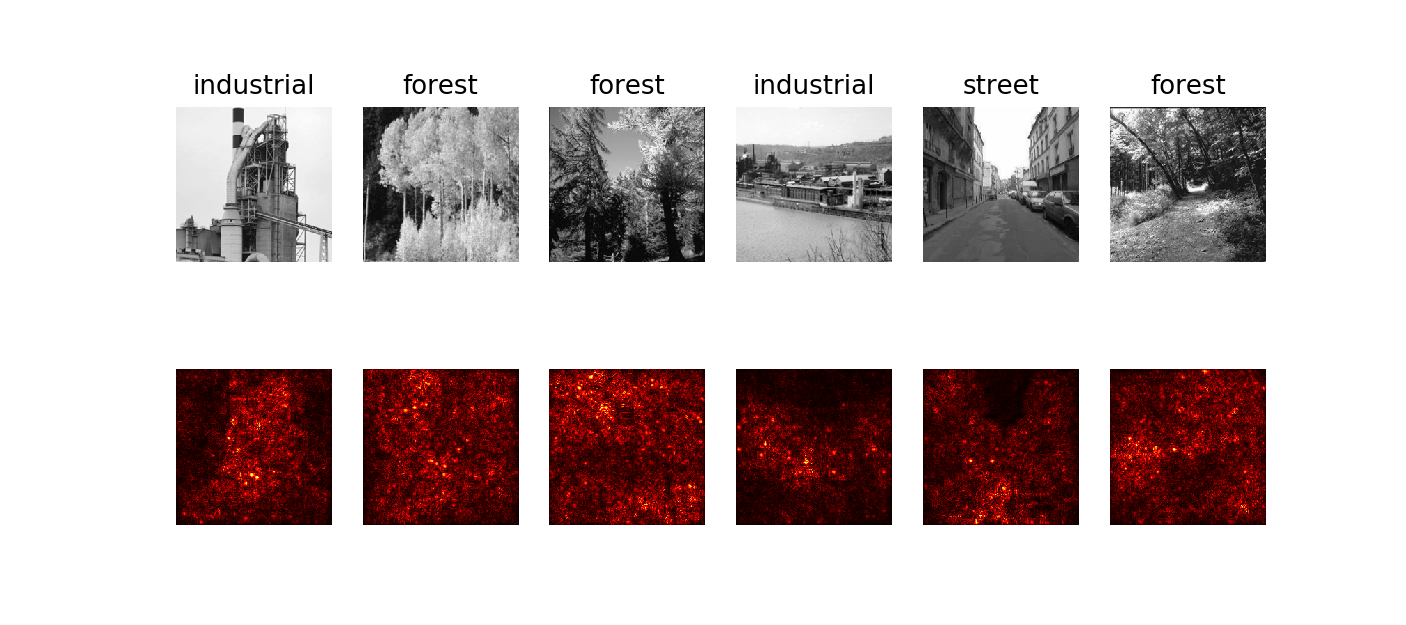

In [35]:
shuffle = np.random.permutation(len(X))[:6]
plot_saliency_map(X[shuffle], saliency[shuffle], name[shuffle])

<IPython.core.display.Javascript object>


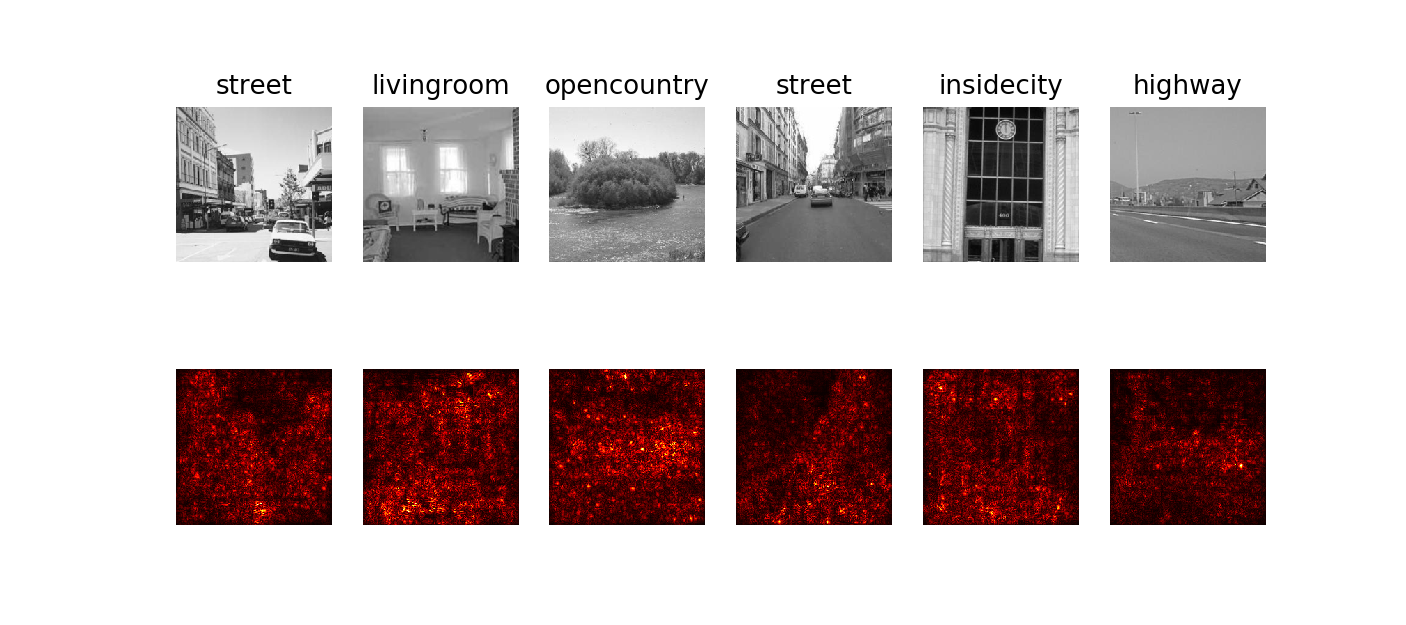

In [37]:
shuffle = np.random.permutation(len(X))[:6]
plot_saliency_map(X[shuffle], saliency[shuffle], name[shuffle])

## Visualize the feature extraction by CNN layers of Alexnet

See the output of an image after passing over various CNN layers of Alexnet.

It can be seen very clearly that higher layers has higher abstraction level on the images information

In [49]:
# Sample N images from the train dataset
indexes = np.random.permutation(len(train_dataset))[:100]
X,y,name = [],[],[]
for idx in indexes:
    img, label = train_dataset[idx][0],train_dataset[idx][1]
    X.append(img), y.append(label), name.append(train_dataset.classes[label])
X = torch.stack(X); y = torch.LongTensor(y); name = np.array(name)

In [51]:
def visualize_AlexNet_layers(N =6):
    shuffle = np.random.permutation(len(X))[:N]
    img, named_classes = X[shuffle].clone(), name[shuffle]

    # passing the images to Alex-net and record images at CNN layers
    # conv_layers are the CNN layers of Alex-net

    conv_layers = ['0','3','6','8','10']
    alex_cal = [img]
    for key, layer in model.features._modules.items():
        img = layer(img)
        if key in conv_layers:
            alex_cal.append(img)

    # Visualize 
    plt.figure(figsize=(10,N*2))
    for row in range(N):
        visual = [img[row] for img in alex_cal]
        for ii in range(len(visual)):
            plt.subplot(N,6,row*6+ii+1)
            img_tensor = detransform(visual[ii].clone()) if ii == 0 else visual[ii].clone().squeeze(0)

            #Randomly sample only one CNN feature at a given layer
            img_np = img_tensor[np.random.choice(len(img_tensor))].numpy()
            plt.imshow(np.clip(img_np,0,1),cmap='gray'); plt.axis('off')
            plt.title(named_classes[row] if ii == 0 else 'CNN [%s]' %(conv_layers[ii-1]))
    plt.show()

<IPython.core.display.Javascript object>


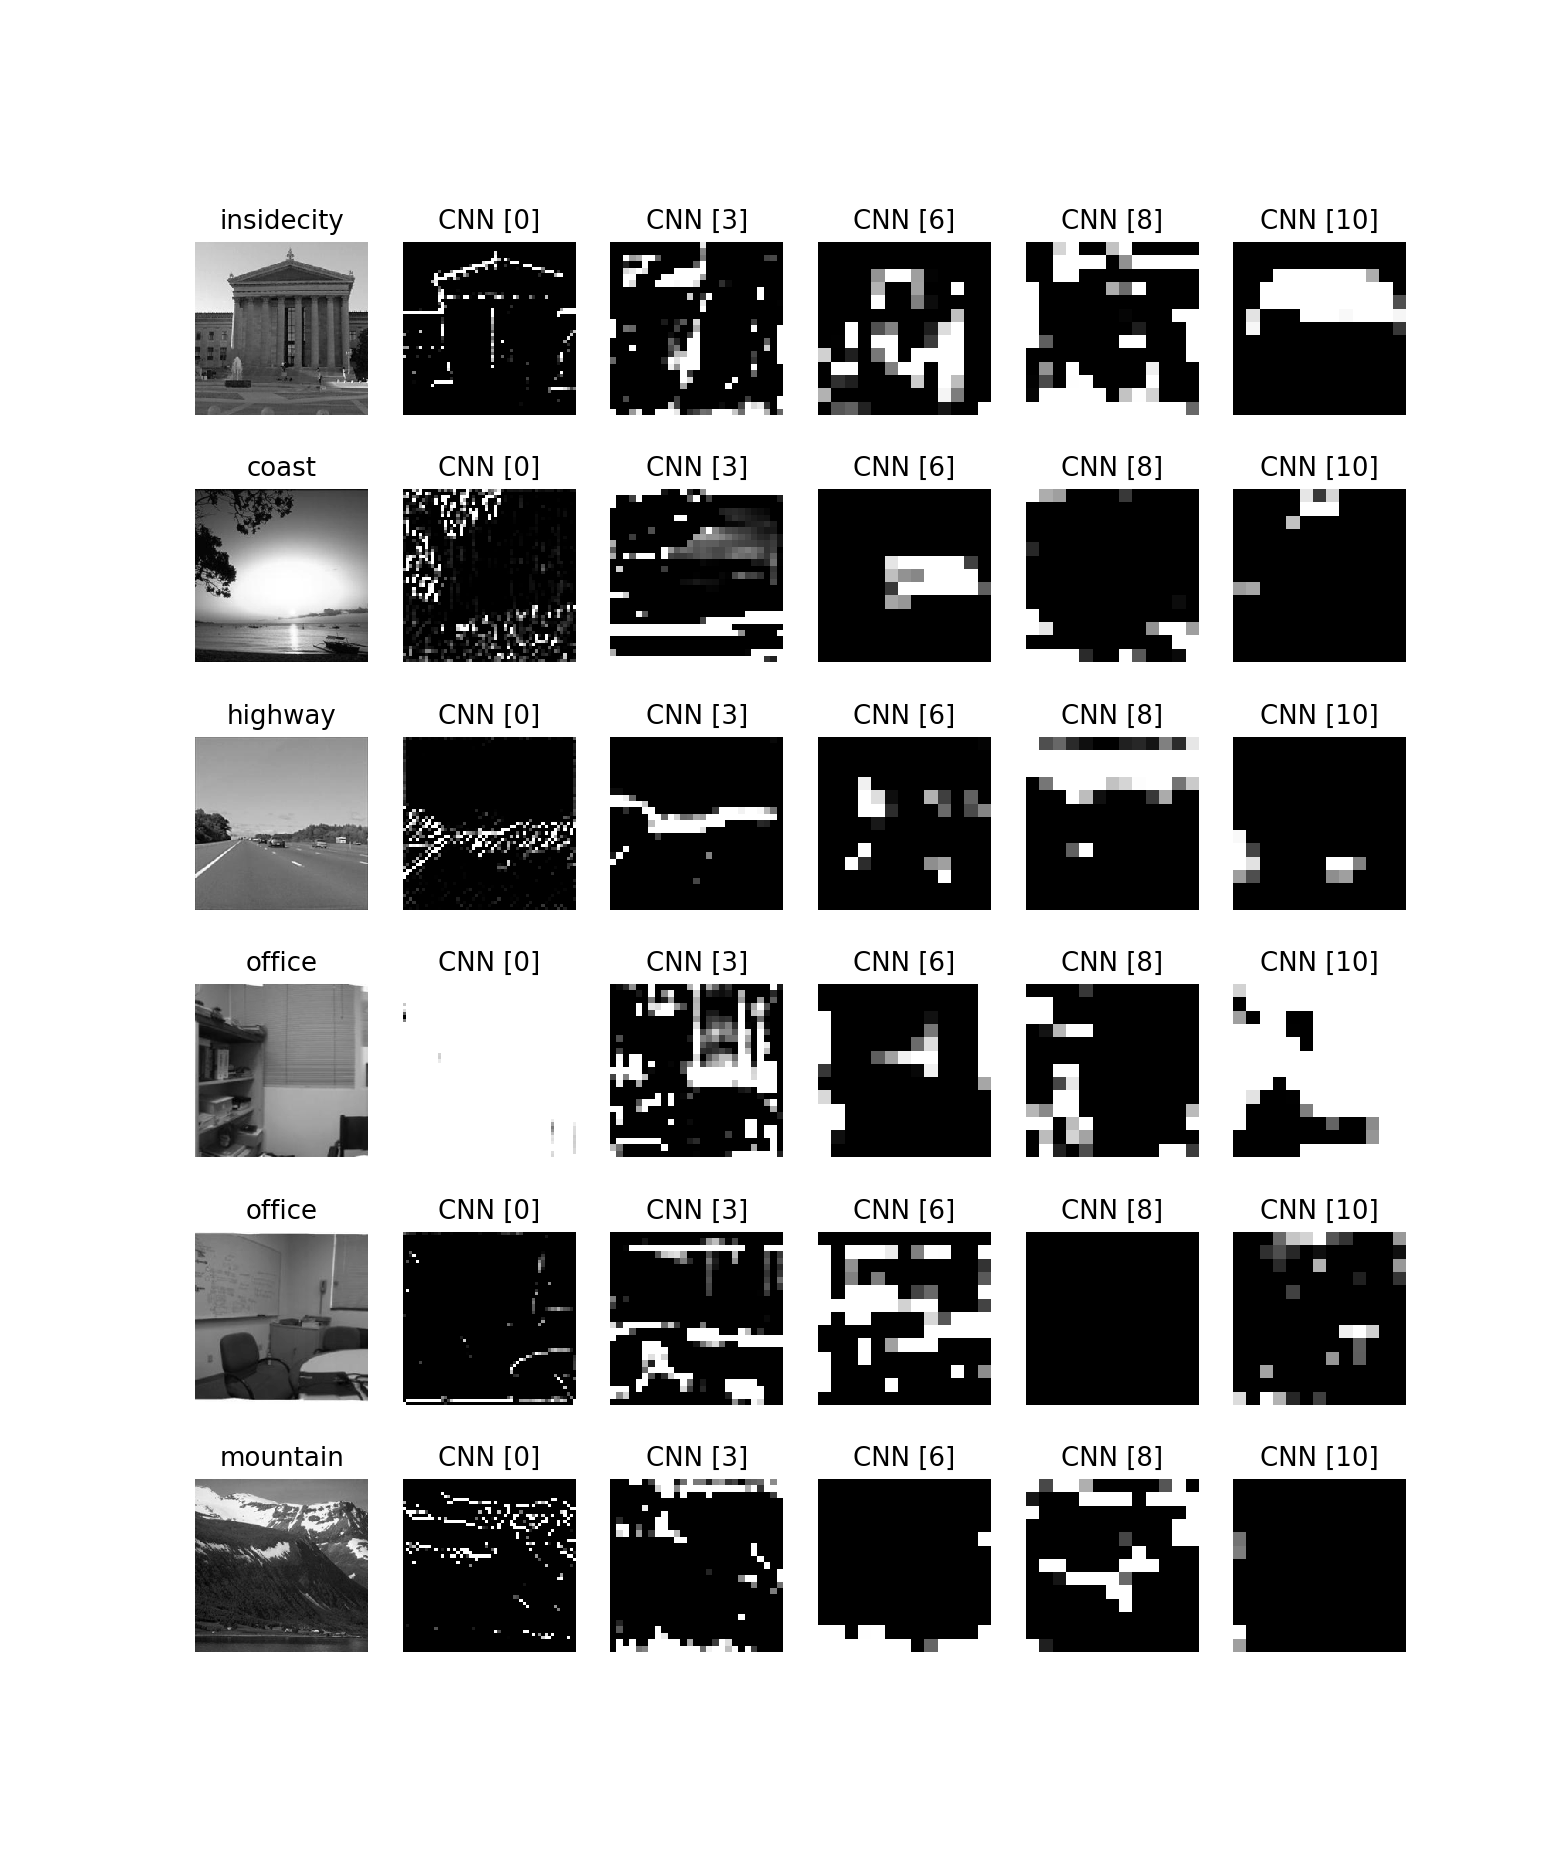

In [52]:
visualize_AlexNet_layers(N =6)

<IPython.core.display.Javascript object>


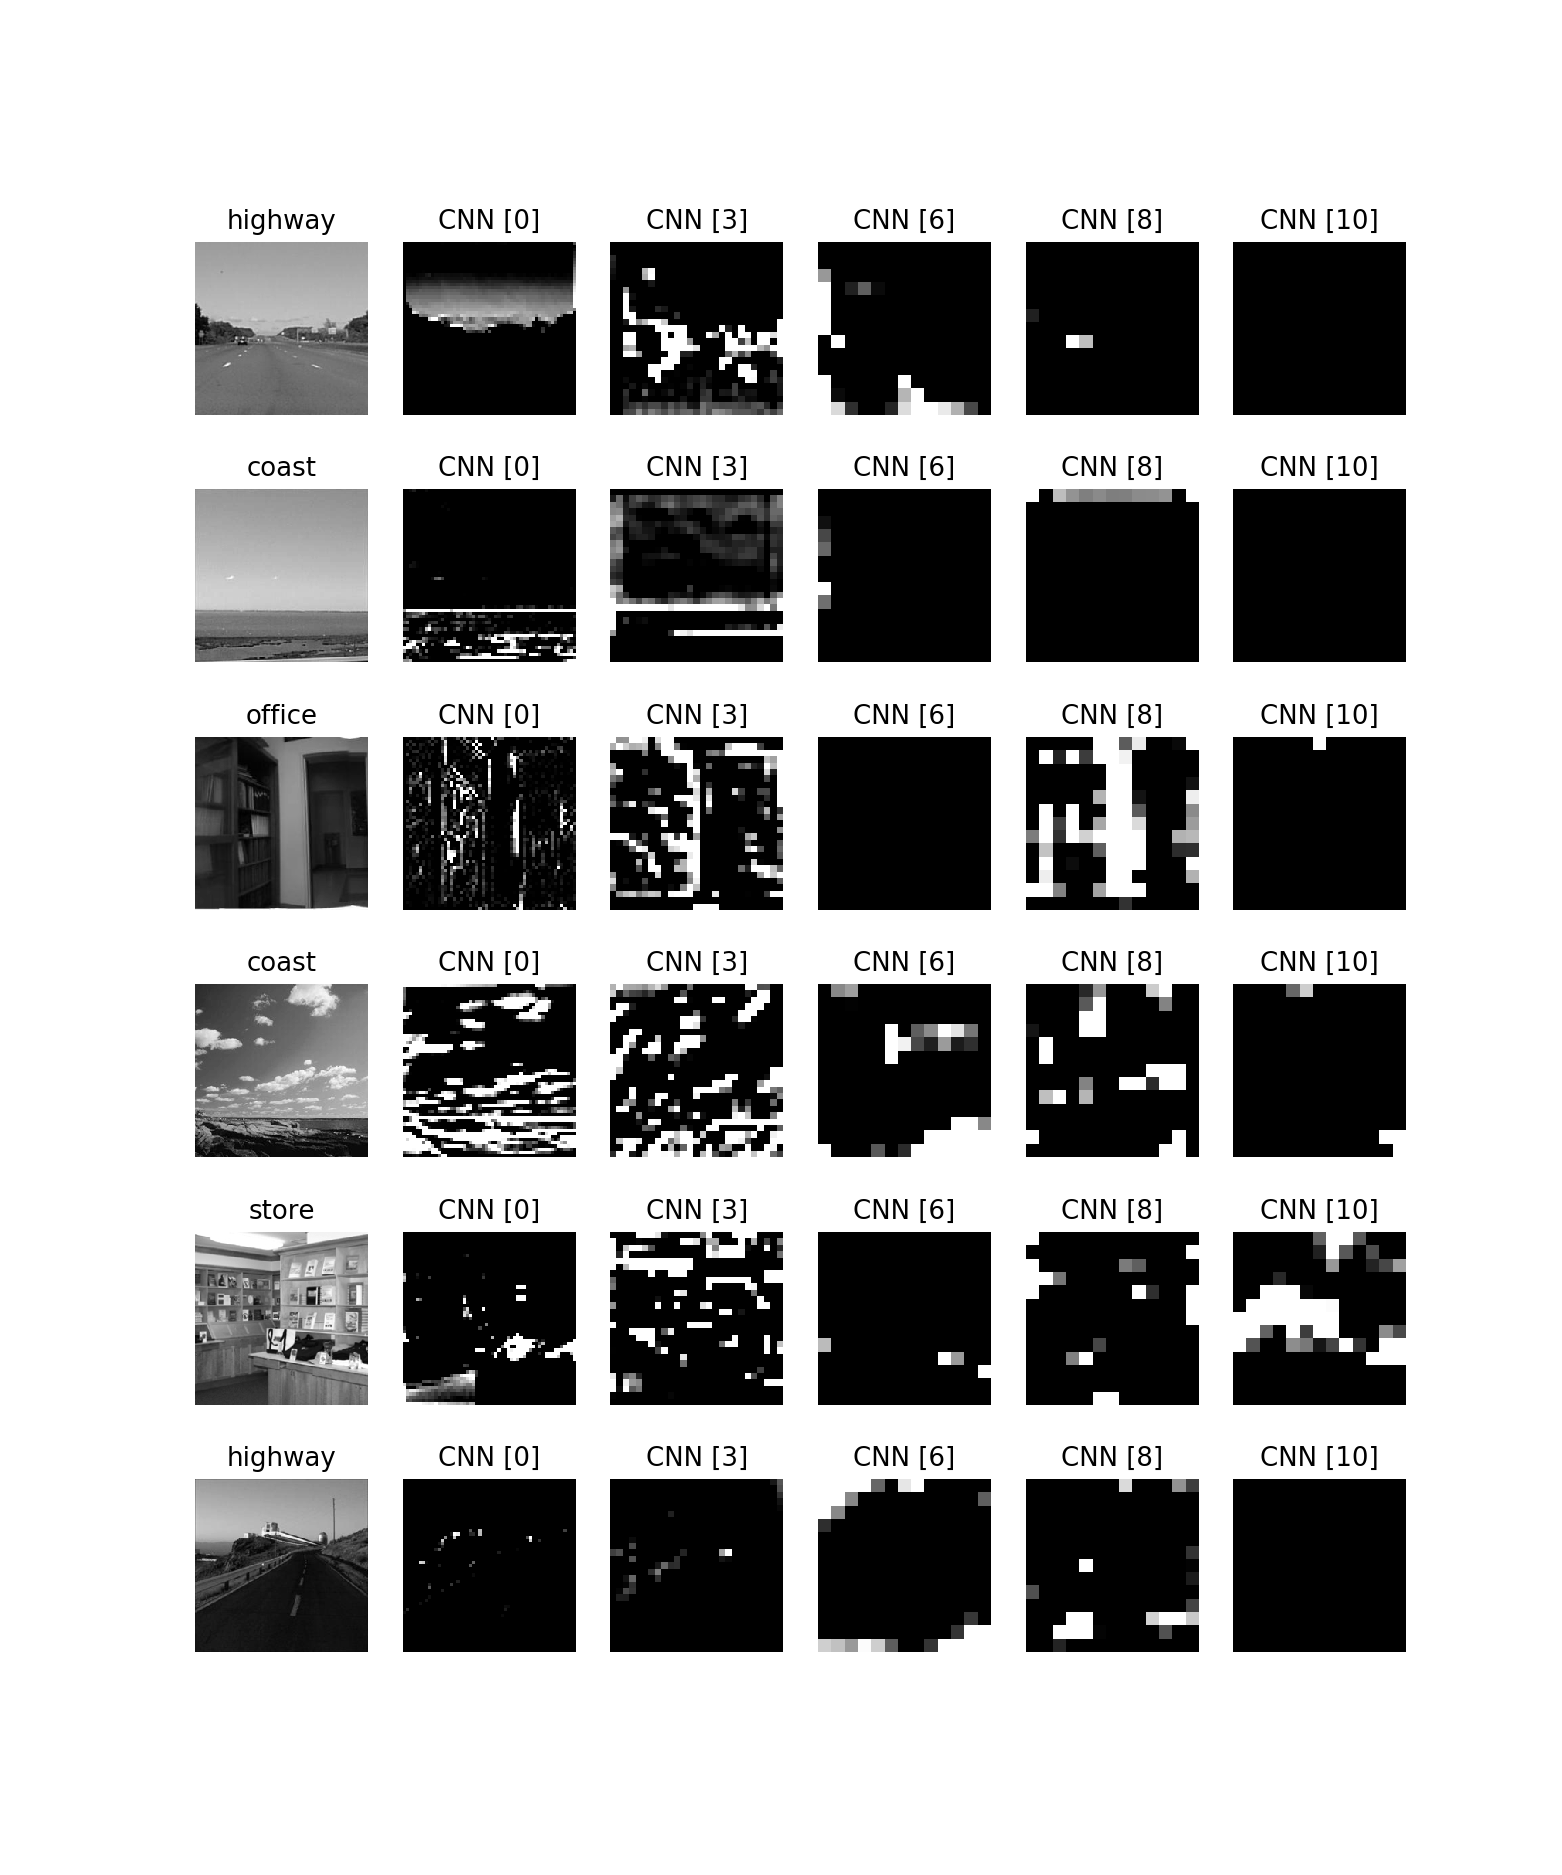

In [53]:
visualize_AlexNet_layers(N =6)

<IPython.core.display.Javascript object>


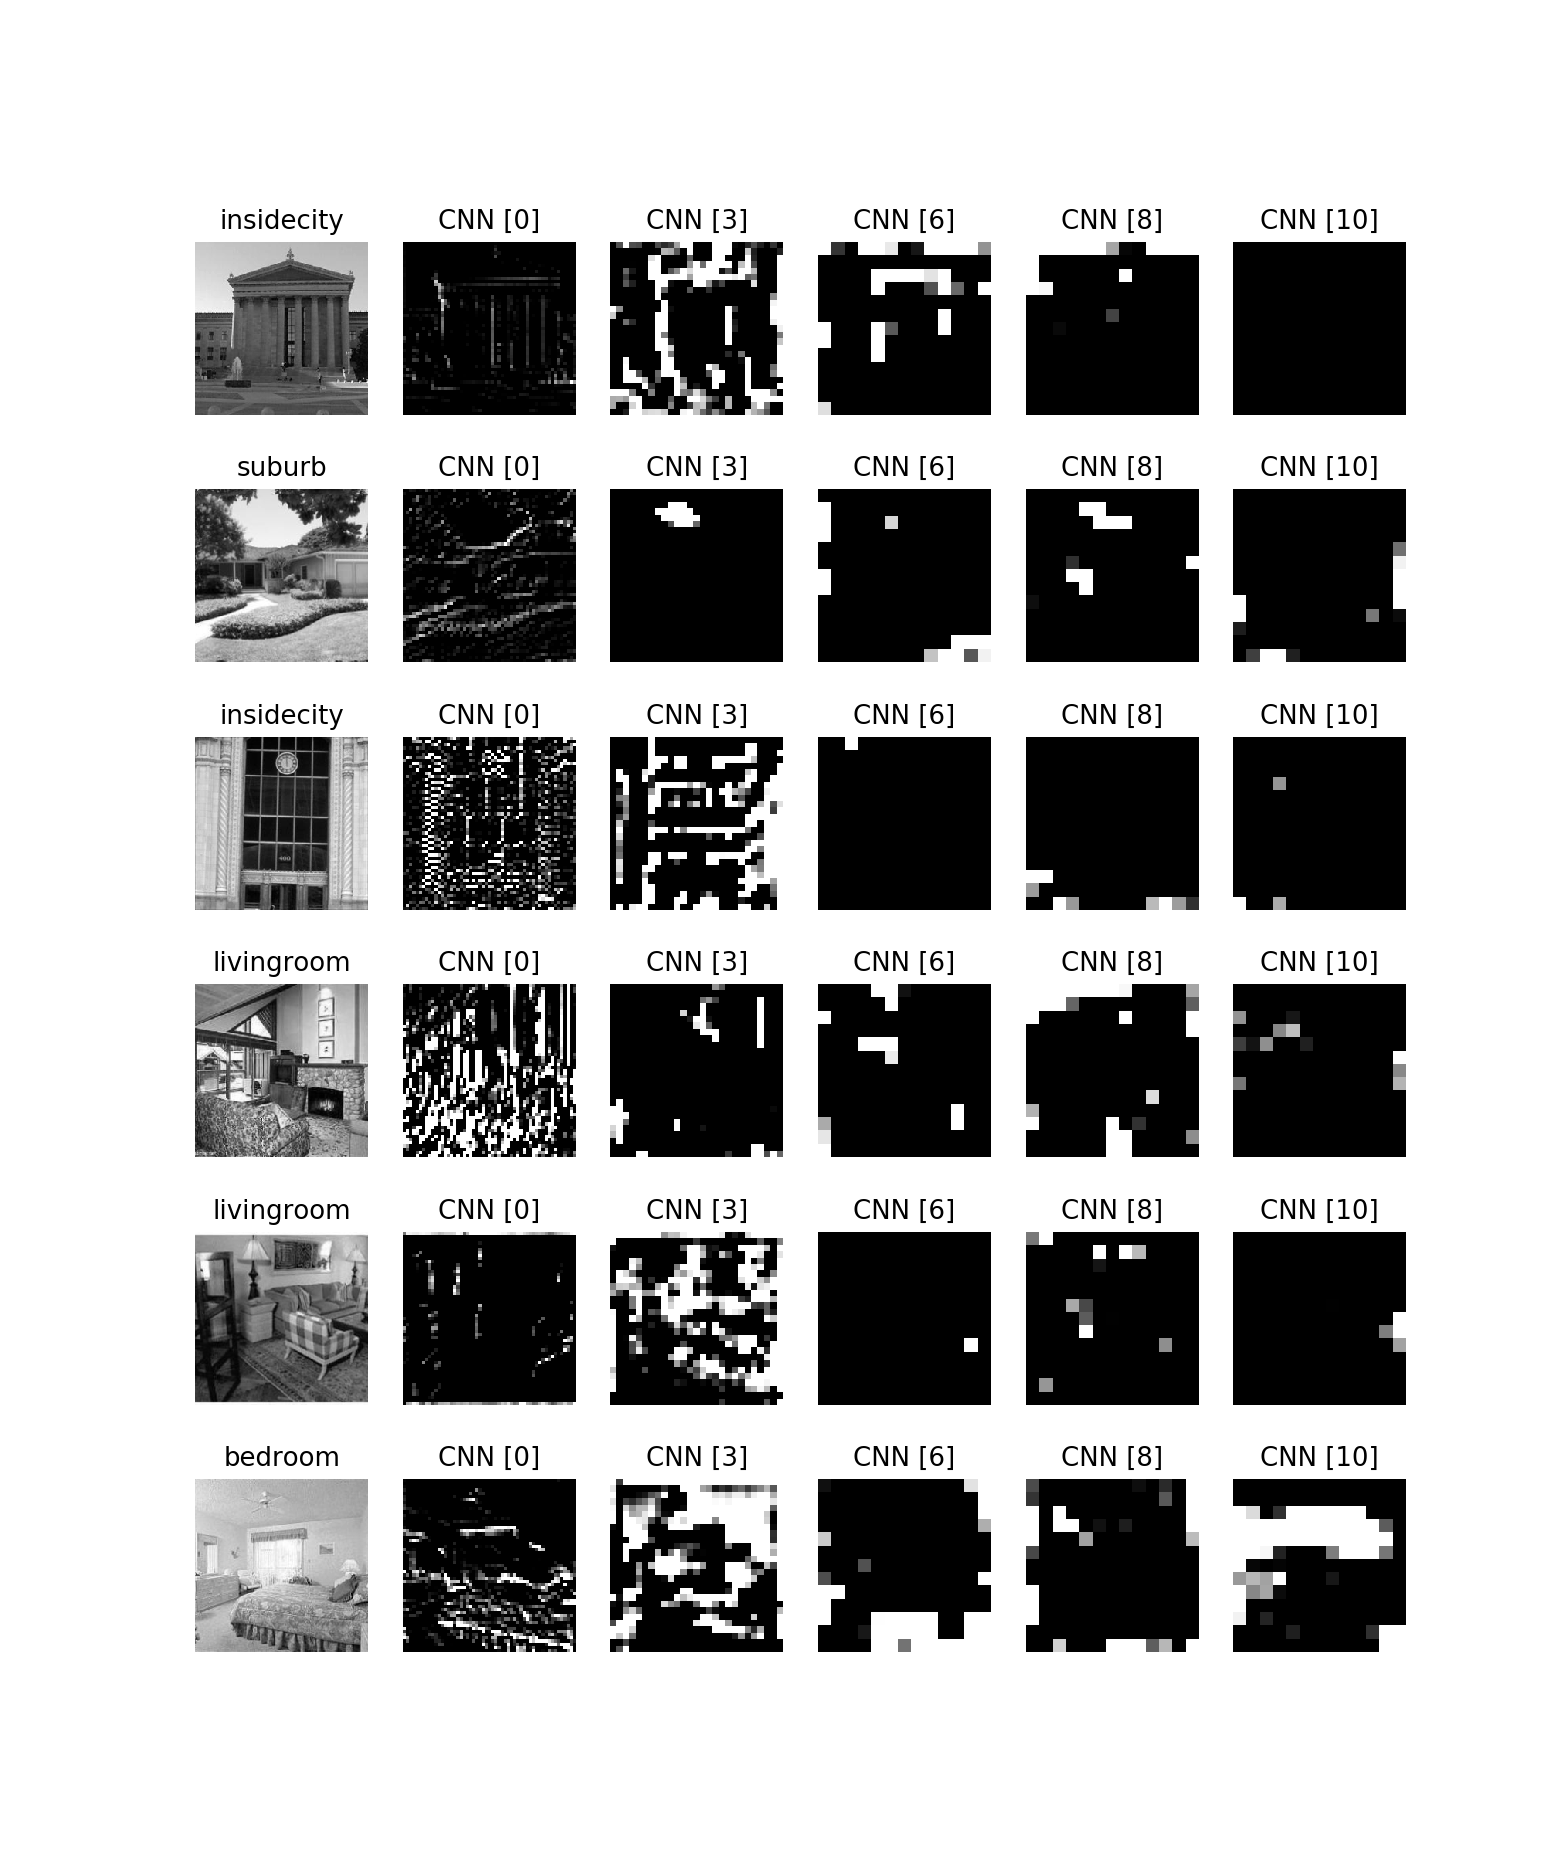

In [54]:
visualize_AlexNet_layers(N =6)